# 1. Interpretion and significance

Suppose that we would like to know how much families in the US are spending on recreation annually. We estimated the following model:

$$ expenditure = 873 + 0.0012annual\_income + 0.00002annual\_income^2 - 223.57have\_kids $$

expenditure is the annual spending on recreation in US dollars, annual_income is the annual income in US dollars and have_kids is a dummy variable indicating the families with children. Interpret the estimated coefficients. What additional statistics should be given in order to make sure that your interpretations make sense statistically. Write up your answer and save in a Gist.

- Linear regression modelinde hedef değişken ile katsayılar arasında doğrusal bir ilişki olması gerekir. Hedef değişken ile özellikler arasındaki ilişkinin doğrusal olması zorunluluğu yoktur. Görüldüğü üzere hedef değişken ile 𝑎𝑛𝑛𝑢𝑎𝑙_𝑖𝑛𝑐𝑜𝑚𝑒 arasında ikinci dereceden bir ilişki vardır. Formülde hedef değişken ile katsayılar arasındaki ilişkiye bakıldığı zaman doğrusal olduğu görülür. Bu model doğrusallık varsayımını karşılar. Çocuk sayısı arttıkça 𝑒𝑥𝑝𝑒𝑛𝑑𝑖𝑡𝑢𝑟𝑒 azalırken yıllık gelir arttıkça 𝑒𝑥𝑝𝑒𝑛𝑑𝑖𝑡𝑢𝑟𝑒 artar çıkarımını yapabiliriz.

- Bireysel özelliklerin hedef değişkenin açıklanmasında significant (anlamlı) olup olmadığını belirlemek için t-testi kullanılır. T-testi katsayı tahmininin sıfırdan farklı olup olmadığını belirler. T-testi ile ilişkili p-value tahmin edilen katsayının gerçek popülasyonda sıfıra eşit olma olasılığını ölçer. P-value ne kadar düşük olursa katsayı o kadar anlamlı olur. P-value 0.05'ten küçükse katsayı anlamlıdır diyebiliriz.

# 2. Weather model

In this exercise, you'll work with the historical temperature data from the previous lesson. To complete this assignment, submit a link in the gist file to the Jupyter notebook containing your solutions to the following tasks:

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [2]:
weather_df = pd.read_csv("https://djl-lms-assets.s3.eu-central-1.amazonaws.com/datasets/weatherHistory.csv")
weather_df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


- Build a linear regression model where your target variable is the difference between the apparenttemperature and the temperature. As explanatory variables, use humidity and windspeed. Now, estimate your model using OLS. Are the estimated coefficients statistically significant? Are the signs of the estimated coefficients in line with your previous expectations? Interpret the estimated coefficients. What are the relations between the target and the explanatory variables?

In [3]:
weather_df.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

In [4]:
weather_df['target'] = weather_df['Apparent Temperature (C)'] - weather_df['Temperature (C)']

In [5]:
X = weather_df[['Humidity', 'Wind Speed (km/h)']]
Y = weather_df['target']
X = sm.add_constant(X)
results = sm.OLS(Y,X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.288
Method:                 Least Squares   F-statistic:                 1.949e+04
Date:                Sun, 23 May 2021   Prob (F-statistic):               0.00
Time:                        15:22:10   Log-Likelihood:            -1.7046e+05
No. Observations:               96453   AIC:                         3.409e+05
Df Residuals:                   96450   BIC:                         3.409e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 2.4381      0.021    115.948      0.000       2.397       2.479
Humidity             -3.0292      0.024   -126.479      0.000      -3.076      -2.982
Wind Speed (km/h)    -0.1193      0.001   -176.164      0.000      -0.121      -0.118
==============================================================================
Omnibus:                     3935.747   Durbin-Watson:                   0.264
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4613.311
Skew:                          -0.478   Prob(JB):                         0.00
Kurtosis:                       3.484   Cond. No.                         88.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Tahmin edilen katsayıların p değerine baktığımızda sıfıra eşit olduğunu görüyoruz. Bu da modelimizdeki katsayıların anlamlı olduğunu gösterir. 𝐻𝑢𝑚𝑖𝑑𝑖𝑡𝑦 ve 𝑊𝑖𝑛𝑑𝑆𝑝𝑒𝑒𝑑 (𝑘𝑚/ℎ) arttıkça sıcaklık azalır. Katsayılara bakıldığında da azaldığı görülür. İşaretler bu anlamda beklentiye uygundur. R-squared değerine baktığımızda ise elimizde kötü bir model olduğu yorumunu yapabiliriz. Modelimizde kullandığımız özelliklerin hedef değişkenin açıklanmasında yetersiz olduğu görülür.

In [6]:
weather_df['humidity_windspeed'] = weather_df['Humidity'] * weather_df['Wind Speed (km/h)']

In [7]:
X = weather_df[['Humidity', 'Wind Speed (km/h)','humidity_windspeed' ]]
Y = weather_df['target']
X = sm.add_constant(X)
results = sm.OLS(Y,X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.341
Model:                            OLS   Adj. R-squared:                  0.341
Method:                 Least Squares   F-statistic:                 1.666e+04
Date:                Sun, 23 May 2021   Prob (F-statistic):               0.00
Time:                        15:22:14   Log-Likelihood:            -1.6669e+05
No. Observations:               96453   AIC:                         3.334e+05
Df Residuals:                   96449   BIC:                         3.334e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0839      0.033      2.511      0.012       0.018       0.149
Humidity               0.1775      0.043      4.133      0.000       0.093       0.262
Wind Speed (km/h)      0.0905      0.002     36.797      0.000       0.086       0.095
humidity_windspeed    -0.2971      0.003    -88.470      0.000      -0.304      -0.291
==============================================================================
Omnibus:                     4849.937   Durbin-Watson:                   0.262
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9295.404
Skew:                          -0.378   Prob(JB):                         0.00
Kurtosis:                       4.320   Cond. No.                         193.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

𝐻𝑢𝑚𝑖𝑑𝑖𝑡𝑦 ve 𝑊𝑖𝑛𝑑𝑆𝑝𝑒𝑒𝑑 (𝑘𝑚/ℎ) için tahmin edilen katsayıların işaretleri değişti. 𝑊𝑖𝑛𝑑𝑆𝑝𝑒𝑒𝑑 (𝑘𝑚/ℎ) arttıkça sıcaklık daha düşük hissedilir. Hissedilen sıcaklık ile gerçek sıcaklık arasındaki fark artar. 𝐻𝑢𝑚𝑖𝑑𝑖𝑡𝑦 arttıkça hissedilen sıcaklık artar. Gerçek sıcaklık ile hissedilen sıcaklık arasındaki fark daha fazla olur. 𝐻𝑢𝑚𝑖𝑑𝑖𝑡𝑦 ve 𝑊𝑖𝑛𝑑𝑆𝑝𝑒𝑒𝑑 (𝑘𝑚/ℎ) arasında ters ilişki vardır. 𝐻𝑢𝑚𝑖𝑑𝑖𝑡𝑦 arttıkça 𝑊𝑖𝑛𝑑𝑆𝑝𝑒𝑒𝑑 (𝑘𝑚/ℎ) azalması beklenir.

# 3. House prices model

In this exercise, you'll interpret your house prices model. To complete this assignment, submit a link in the gist file to the Jupyter notebook containing your solutions to the following tasks:

In [8]:
house_prices_df = pd.read_csv("https://djl-lms-assets.s3.eu-central-1.amazonaws.com/datasets/house_prices.csv", sep = ";")
house_prices_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


- Run your house prices model again and interpret the results. Which features are statistically significant and which are not?

In [9]:
house_price = pd.DataFrame()
house_price = house_prices_df[['MSSubClass', 'MSZoning','LotArea','Street','LotShape','Neighborhood','BldgType','GrLivArea',
                               'OverallQual','YearBuilt','RoofStyle', 'HouseStyle' ,'TotalBsmtSF', 'Heating','TotRmsAbvGrd',
                               'Fireplaces','GarageCars','PoolArea', 'YrSold', 'SaleType','SaleCondition','FullBath',
                               'SalePrice']]

In [10]:
for col in house_price.select_dtypes(include='object'):
    df = pd.DataFrame(house_price[col].unique())
    df.columns = [col]
    for i in house_price[col].unique():
        house_price.loc[house_price[col] == i , col+'_num'] = df[df[col] == i ].index[0]

In [11]:
Y = house_price['SalePrice']
X = house_price[['MSZoning_num','LotArea','BldgType_num','GrLivArea','YearBuilt', 'OverallQual', 
                 'TotalBsmtSF', 'GarageCars']]
X = sm.add_constant(X)
results = sm.OLS(Y , X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     643.3
Date:                Sun, 23 May 2021   Prob (F-statistic):               0.00
Time:                        15:22:33   Log-Likelihood:                -17439.
No. Observations:                1460   AIC:                         3.490e+04
Df Residuals:                    1451   BIC:                         3.494e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -8.083e+05   8.53e+04     -9.471      0.000   -9.76e+05   -6.41e+05
MSZoning_num -1719.9055   1305.959     -1.317      0.188   -4281.674     841.863
LotArea          0.5319      0.106      5.022      0.000       0.324       0.740
BldgType_num -5754.4535   1004.357     -5.729      0.000   -7724.600   -3784.306
GrLivArea       47.1781      2.543     18.550      0.000      42.189      52.167
YearBuilt      373.2432     44.864      8.319      0.000     285.239     461.248
OverallQual   2.142e+04   1139.929     18.787      0.000    1.92e+04    2.37e+04
TotalBsmtSF     24.5850      2.841      8.652      0.000      19.011      30.159
GarageCars    1.298e+04   1785.521      7.267      0.000    9472.892    1.65e+04
==============================================================================
Omnibus:                      446.731   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            54638.022
Skew:                          -0.233   Prob(JB):                         0.00
Kurtosis:                      32.966   Cond. No.                     1.28e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.28e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

𝑀𝑆𝑍𝑜𝑛𝑖𝑛𝑔_𝑛𝑢𝑚 haricindeki tüm katsayılar istatiksel olarak anlamlıdır.

- Now, exclude the insignificant features from your model. Did anything change?

In [12]:
Y = house_price['SalePrice']
X = house_price[['LotArea','BldgType_num','GrLivArea','YearBuilt', 'OverallQual', 
                 'TotalBsmtSF', 'GarageCars']]
X = sm.add_constant(X)
results = sm.OLS(Y , X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     734.5
Date:                Sun, 23 May 2021   Prob (F-statistic):               0.00
Time:                        15:23:00   Log-Likelihood:                -17439.
No. Observations:                1460   AIC:                         3.489e+04
Df Residuals:                    1452   BIC:                         3.494e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -8.204e+05   8.49e+04     -9.666      0.000   -9.87e+05   -6.54e+05
LotArea          0.5426      0.106      5.136      0.000       0.335       0.750
BldgType_num -6095.9478    970.552     -6.281      0.000   -7999.782   -4192.114
GrLivArea       47.1553      2.544     18.537      0.000      42.165      52.145
YearBuilt      379.2687     44.641      8.496      0.000     291.701     466.837
OverallQual   2.126e+04   1134.320     18.746      0.000     1.9e+04    2.35e+04
TotalBsmtSF     25.0935      2.816      8.912      0.000      19.570      30.617
GarageCars      1.3e+04   1785.862      7.280      0.000    9498.425    1.65e+04
==============================================================================
Omnibus:                      450.238   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            55732.441
Skew:                          -0.251   Prob(JB):                         0.00
Kurtosis:                      33.264   Cond. No.                     1.27e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.27e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

R-squared değerinde bir değişim olmadı. Tahmin edilen katsayılarda değişimler oldu. 

- Interpret the statistically significant coefficients by quantifying their relations with the house prices. Which features have more prominent effect on the house prices?

Katsayılara baktığımız zaman en çok etki eden katsayıların 𝑂𝑣𝑒𝑟𝑎𝑙𝑙𝑄𝑢𝑎𝑙 , 𝑇𝑜𝑡𝑎𝑙𝐵𝑠𝑚𝑡𝑆𝐹 , 𝐺𝑎𝑟𝑎𝑔𝑒𝐶𝑎𝑟𝑠 ve 𝐺𝑟𝐿𝑖𝑣𝐴𝑟𝑒𝑎 olduğu görülür.

In [24]:
house_price.groupby(by='OverallQual')['SalePrice'].mean()

OverallQual
1      50150.000000
2      51770.333333
3      87473.750000
4     108420.655172
5     133523.347607
6     161603.034759
7     207716.423197
8     274735.535714
9     367513.023256
10    438588.388889
Name: SalePrice, dtype: float64

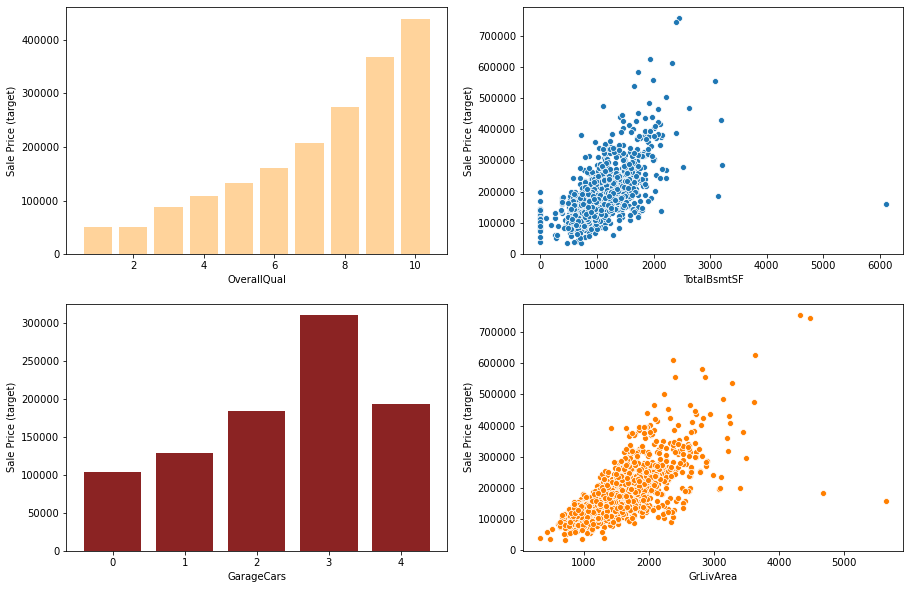

In [25]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.bar(house_price.groupby(by='OverallQual')['SalePrice'].mean().index , 
            house_price.groupby(by='OverallQual')['SalePrice'].mean() , color = '#FFD39B')
plt.xlabel('OverallQual')
plt.ylabel('Sale Price (target)')

plt.subplot(2,2,2)
sns.scatterplot(x = 'TotalBsmtSF' , y = 'SalePrice' , data = house_price)
plt.xlabel('TotalBsmtSF')
plt.ylabel('Sale Price (target)')

plt.subplot(2,2,3)
plt.bar(house_price.groupby(by='GarageCars')['SalePrice'].mean().index , 
            house_price.groupby(by='GarageCars')['SalePrice'].mean() , color = '#8B2323')
plt.xlabel('GarageCars')
plt.ylabel('Sale Price (target)')

plt.subplot(2,2,4)
sns.scatterplot(x = 'GrLivArea' , y = 'SalePrice' , data = house_price , color = '#FF7F00')
plt.xlabel('GrLivArea')
plt.ylabel('Sale Price (target)')

plt.show()

- Do the results sound reasonable to you? If not, try to explain the potential reasons.

Sonuçlar beklediğim yönde oldu. Bir evin fiyatının belirlenmesinde yapı malzemelerinin kalitesi , binanın yapım tarihi , toplam alan , oda sayısı , araba kapasitesi gibi özelliklerin belirleyici olduğu düşündüm ve bu özelliklerin bazılarını kullanarak model geliştirdiğimde iyi bir model elde ettim.